In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-mumu-mZ5000GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-5000-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-5000-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-5000-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-5000-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-5000-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-5000-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-5000-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-5000-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-5000-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-5000-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-5000-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-5000-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

721501
720147


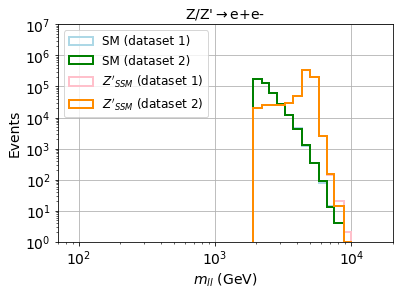

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/mumu/"

invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 2)")


folder_saved = "Zprime-SSM-mumu-mZ5000GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/mumu/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.65 or e1eta_eeSM[i] > 2.65 or e2eta_eeSM[i] < -2.65 or e2eta_eeSM[i] > 2.65:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800_2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800_2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800_2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800_2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800_2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800_2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.65 or e1eta_eeSM_1800[i] > 2.65 or e2eta_eeSM_1800[i] < -2.65 or e2eta_eeSM_1800[i] > 2.65:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800




# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.646
2.648
-2.649
2.649


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-mumu-mZ5000GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-5000-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-5000-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-5000-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-5000-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-5000-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-5000-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.65 or e1eta_eeSSMZprime[i] > 2.65 or e2eta_eeSSMZprime[i] < -2.65 or e2eta_eeSSMZprime[i] > 2.65:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)

        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-5000-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-5000-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-5000-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-5000-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-5000-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-5000-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.65 or e1eta_eeSSMZprime_2[i] > 2.65 or e2eta_eeSSMZprime_2[i] < -2.65 or e2eta_eeSSMZprime_2[i] > 2.65:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2








# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.720128
(1441606,)
(1441606,)
(1441606,)
(1441606,)
(1441606,)
(1441606,)
(1441606,)
(1441606,)
(1441606,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.629
2.635
-2.649
2.649


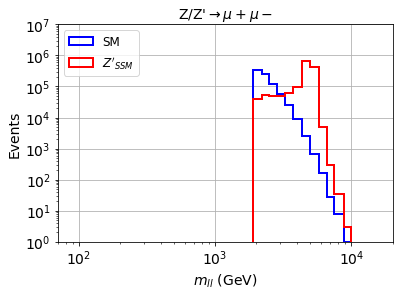

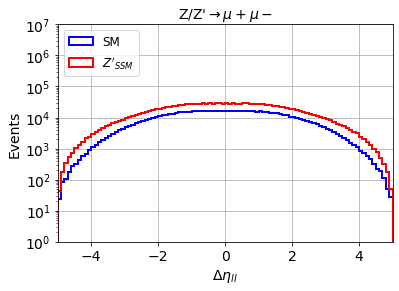

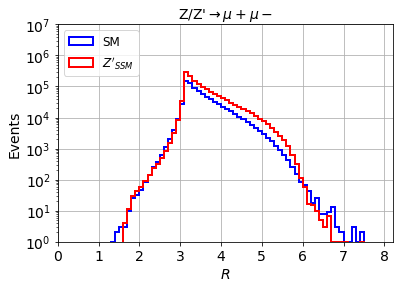

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.237383  0.591235  0.081158  0.279270  0.609664  0.557288  0.039780   
1        0.231715  0.636759  0.312540  0.265668  0.353341  0.827976  0.121861   
2        0.313298  0.703627  0.972311  0.347861  0.502831  0.473265  0.181610   
3        0.218136  0.581224  0.581158  0.233058  0.567573  0.101528  0.002850   
4        0.193023  0.544012  0.273711  0.242338  0.285957  0.765595  0.061335   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.517921  0.515489  0.892266  0.585320  0.581540  0.393221  0.383801   
1499996  0.231188  0.123347  0.661044  0.259959  0.678935  0.169796  0.426186   
1499997  0.207316  0.777295  0.283259  0.236309  0.204983  0.785805  0.391508   
1499998  0.572974  0.435399  0.264004  0.624024  0.400906  0.764163  0.430443   
1499999  0.166409  0.909331  0.181891  0.205421  0.255002  0.678071  0.421981   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63588	validation_1-logloss:0.63587
[1]	validation_0-logloss:0.58856	validation_1-logloss:0.58870
[2]	validation_0-logloss:0.54846	validation_1-logloss:0.54853
[3]	validation_0-logloss:0.51424	validation_1-logloss:0.51433
[4]	validation_0-logloss:0.48534	validation_1-logloss:0.48548
[5]	validation_0-logloss:0.46059	validation_1-logloss:0.46076
[6]	validation_0-logloss:0.43896	validation_1-logloss:0.43907
[7]	validation_0-logloss:0.41977	validation_1-logloss:0.41994
[8]	validation_0-logloss:0.40297	validation_1-logloss:0.40300
[9]	validation_0-logloss:0.38819	validation_1-logloss:0.38819
[10]	validation_0-logloss:0.37380	validation_1-logloss:0.37379
[11]	validation_0-logloss:0.36240	validation_1-logloss:0.36235
[12]	validation_0-logloss:0.35161	validation_1-logloss:0.35161
[13]	validation_0-logloss:0.34232	validation_1-logloss:0.34244
[14]	validation_0-logloss:0.33441	validation_1-logloss:0.33449
[15]	validation_0-logloss:0.32706	validation_1-logloss:0.32721
[1

[130]	validation_0-logloss:0.23671	validation_1-logloss:0.23892
[131]	validation_0-logloss:0.23670	validation_1-logloss:0.23892
[132]	validation_0-logloss:0.23668	validation_1-logloss:0.23891
[133]	validation_0-logloss:0.23665	validation_1-logloss:0.23889
[134]	validation_0-logloss:0.23663	validation_1-logloss:0.23888
[135]	validation_0-logloss:0.23661	validation_1-logloss:0.23888
[136]	validation_0-logloss:0.23659	validation_1-logloss:0.23888
[137]	validation_0-logloss:0.23656	validation_1-logloss:0.23887
[138]	validation_0-logloss:0.23654	validation_1-logloss:0.23886
[139]	validation_0-logloss:0.23652	validation_1-logloss:0.23885
[140]	validation_0-logloss:0.23650	validation_1-logloss:0.23885
[141]	validation_0-logloss:0.23647	validation_1-logloss:0.23884
[142]	validation_0-logloss:0.23646	validation_1-logloss:0.23884
[143]	validation_0-logloss:0.23645	validation_1-logloss:0.23883
[144]	validation_0-logloss:0.23642	validation_1-logloss:0.23883
[145]	validation_0-logloss:0.23639	valid

[259]	validation_0-logloss:0.23448	validation_1-logloss:0.23851
[260]	validation_0-logloss:0.23447	validation_1-logloss:0.23851
[261]	validation_0-logloss:0.23446	validation_1-logloss:0.23851
[262]	validation_0-logloss:0.23444	validation_1-logloss:0.23851
[263]	validation_0-logloss:0.23442	validation_1-logloss:0.23851
[264]	validation_0-logloss:0.23441	validation_1-logloss:0.23851
[265]	validation_0-logloss:0.23441	validation_1-logloss:0.23851
[266]	validation_0-logloss:0.23440	validation_1-logloss:0.23851
[267]	validation_0-logloss:0.23436	validation_1-logloss:0.23850
[268]	validation_0-logloss:0.23433	validation_1-logloss:0.23850
[269]	validation_0-logloss:0.23431	validation_1-logloss:0.23849
[270]	validation_0-logloss:0.23431	validation_1-logloss:0.23850
[271]	validation_0-logloss:0.23429	validation_1-logloss:0.23849
[272]	validation_0-logloss:0.23427	validation_1-logloss:0.23848
[273]	validation_0-logloss:0.23425	validation_1-logloss:0.23847
[274]	validation_0-logloss:0.23423	valid

[388]	validation_0-logloss:0.23253	validation_1-logloss:0.23837
[389]	validation_0-logloss:0.23250	validation_1-logloss:0.23836
[390]	validation_0-logloss:0.23249	validation_1-logloss:0.23836
[391]	validation_0-logloss:0.23248	validation_1-logloss:0.23836
[392]	validation_0-logloss:0.23247	validation_1-logloss:0.23836
[393]	validation_0-logloss:0.23246	validation_1-logloss:0.23837
[394]	validation_0-logloss:0.23246	validation_1-logloss:0.23837
[395]	validation_0-logloss:0.23244	validation_1-logloss:0.23837
[396]	validation_0-logloss:0.23244	validation_1-logloss:0.23837
[397]	validation_0-logloss:0.23242	validation_1-logloss:0.23837


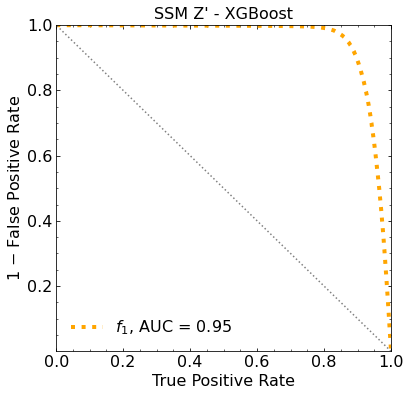

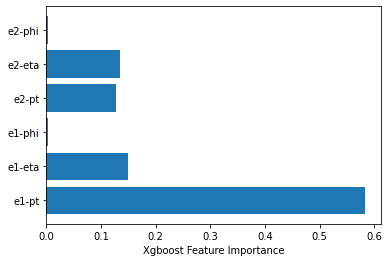

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63571	validation_1-logloss:0.63573
[1]	validation_0-logloss:0.58848	validation_1-logloss:0.58867
[2]	validation_0-logloss:0.54838	validation_1-logloss:0.54873
[3]	validation_0-logloss:0.51428	validation_1-logloss:0.51468
[4]	validation_0-logloss:0.48599	validation_1-logloss:0.48628
[5]	validation_0-logloss:0.46053	validation_1-logloss:0.46096
[6]	validation_0-logloss:0.43878	validation_1-logloss:0.43924
[7]	validation_0-logloss:0.41970	validation_1-logloss:0.42015
[8]	validation_0-logloss:0.40336	validation_1-logloss:0.40384
[9]	validation_0-logloss:0.38816	validation_1-logloss:0.38866
[10]	validation_0-logloss:0.37544	validation_1-logloss:0.37594
[11]	validation_0-logloss:0.36342	validation_1-logloss:0.36401
[12]	validation_0-logloss:0.35293	validation_1-logloss:0.35353
[13]	validation_0-logloss:0.34400	validation_1-logloss:0.34467
[14]	validation_0-logloss:0.33568	validation_1-logloss:0.33636
[15]	validation_0-logloss:0.32654	validation_1-logloss:0.32723
[1

[130]	validation_0-logloss:0.23442	validation_1-logloss:0.23932
[131]	validation_0-logloss:0.23437	validation_1-logloss:0.23933
[132]	validation_0-logloss:0.23431	validation_1-logloss:0.23931
[133]	validation_0-logloss:0.23427	validation_1-logloss:0.23930
[134]	validation_0-logloss:0.23424	validation_1-logloss:0.23930
[135]	validation_0-logloss:0.23422	validation_1-logloss:0.23930
[136]	validation_0-logloss:0.23415	validation_1-logloss:0.23928
[137]	validation_0-logloss:0.23413	validation_1-logloss:0.23929
[138]	validation_0-logloss:0.23403	validation_1-logloss:0.23925
[139]	validation_0-logloss:0.23400	validation_1-logloss:0.23924
[140]	validation_0-logloss:0.23396	validation_1-logloss:0.23924
[141]	validation_0-logloss:0.23393	validation_1-logloss:0.23923
[142]	validation_0-logloss:0.23390	validation_1-logloss:0.23923
[143]	validation_0-logloss:0.23386	validation_1-logloss:0.23922
[144]	validation_0-logloss:0.23384	validation_1-logloss:0.23922
[145]	validation_0-logloss:0.23383	valid

[259]	validation_0-logloss:0.23037	validation_1-logloss:0.23903
[260]	validation_0-logloss:0.23037	validation_1-logloss:0.23903
[261]	validation_0-logloss:0.23035	validation_1-logloss:0.23903
[262]	validation_0-logloss:0.23033	validation_1-logloss:0.23903
[263]	validation_0-logloss:0.23031	validation_1-logloss:0.23904


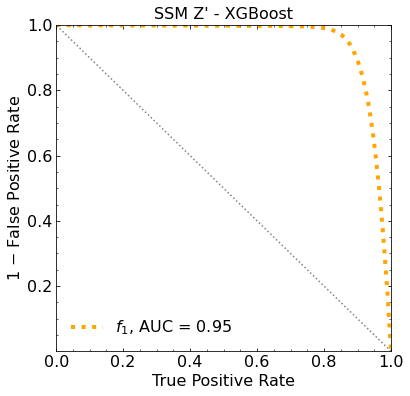


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63590	validation_1-logloss:0.63587
[1]	validation_0-logloss:0.58843	validation_1-logloss:0.58874
[2]	validation_0-logloss:0.54878	validation_1-logloss:0.54903
[3]	validation_0-logloss:0.51481	validation_1-logloss:0.51514
[4]	validation_0-logloss:0.48559	validation_1-logloss:0.48596
[5]	validation_0-logloss:0.45989	validation_1-logloss:0.46022
[6]	validation_0-logloss:0.43859	validation_1-logloss:0.43894
[7]	validation_0-logloss:0.41919	validation_1-logloss:0.41955
[8]	validation_0-logloss:0.40269	validation_1-logloss:0.40302
[9]	validation_0-logloss:0.38818	validation_1-logloss:0.38848
[10]	validation_0-logloss:0.37518	validation_1-logloss:0.37547
[11]	validation_0-logloss:0.36357	validation_1-logloss:0.36386
[12]	validation_0-logloss:0.35317	validation_1-logloss:0.35344
[13]	validation_0-logloss:0.34391	validation_1-logloss:0.34420
[14]	validation_0-logloss:0.33427	validation_1-logloss:0.33470
[15]	validation_0-logloss:0.32664	validation_1-logloss:0.32708
[1

[130]	validation_0-logloss:0.23471	validation_1-logloss:0.23937
[131]	validation_0-logloss:0.23465	validation_1-logloss:0.23935
[132]	validation_0-logloss:0.23461	validation_1-logloss:0.23931
[133]	validation_0-logloss:0.23456	validation_1-logloss:0.23930
[134]	validation_0-logloss:0.23451	validation_1-logloss:0.23930
[135]	validation_0-logloss:0.23448	validation_1-logloss:0.23930
[136]	validation_0-logloss:0.23446	validation_1-logloss:0.23930
[137]	validation_0-logloss:0.23442	validation_1-logloss:0.23930
[138]	validation_0-logloss:0.23438	validation_1-logloss:0.23929
[139]	validation_0-logloss:0.23433	validation_1-logloss:0.23929
[140]	validation_0-logloss:0.23423	validation_1-logloss:0.23925
[141]	validation_0-logloss:0.23421	validation_1-logloss:0.23925
[142]	validation_0-logloss:0.23419	validation_1-logloss:0.23925
[143]	validation_0-logloss:0.23416	validation_1-logloss:0.23925
[144]	validation_0-logloss:0.23408	validation_1-logloss:0.23923
[145]	validation_0-logloss:0.23404	valid

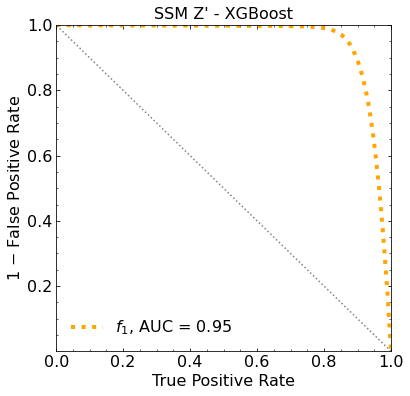


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63585	validation_1-logloss:0.63591
[1]	validation_0-logloss:0.58819	validation_1-logloss:0.58848
[2]	validation_0-logloss:0.54770	validation_1-logloss:0.54815
[3]	validation_0-logloss:0.51419	validation_1-logloss:0.51465
[4]	validation_0-logloss:0.48515	validation_1-logloss:0.48581
[5]	validation_0-logloss:0.46011	validation_1-logloss:0.46079
[6]	validation_0-logloss:0.43808	validation_1-logloss:0.43888
[7]	validation_0-logloss:0.41923	validation_1-logloss:0.41998
[8]	validation_0-logloss:0.40284	validation_1-logloss:0.40361
[9]	validation_0-logloss:0.38748	validation_1-logloss:0.38837
[10]	validation_0-logloss:0.37493	validation_1-logloss:0.37587
[11]	validation_0-logloss:0.36344	validation_1-logloss:0.36435
[12]	validation_0-logloss:0.35158	validation_1-logloss:0.35257
[13]	validation_0-logloss:0.34256	validation_1-logloss:0.34366
[14]	validation_0-logloss:0.33392	validation_1-logloss:0.33494
[15]	validation_0-logloss:0.32615	validation_1-logloss:0.32730
[1

[130]	validation_0-logloss:0.23415	validation_1-logloss:0.23947
[131]	validation_0-logloss:0.23412	validation_1-logloss:0.23947
[132]	validation_0-logloss:0.23409	validation_1-logloss:0.23947
[133]	validation_0-logloss:0.23406	validation_1-logloss:0.23946
[134]	validation_0-logloss:0.23396	validation_1-logloss:0.23941
[135]	validation_0-logloss:0.23390	validation_1-logloss:0.23939
[136]	validation_0-logloss:0.23386	validation_1-logloss:0.23939
[137]	validation_0-logloss:0.23380	validation_1-logloss:0.23936
[138]	validation_0-logloss:0.23377	validation_1-logloss:0.23936
[139]	validation_0-logloss:0.23370	validation_1-logloss:0.23933
[140]	validation_0-logloss:0.23367	validation_1-logloss:0.23933
[141]	validation_0-logloss:0.23363	validation_1-logloss:0.23933
[142]	validation_0-logloss:0.23360	validation_1-logloss:0.23932
[143]	validation_0-logloss:0.23355	validation_1-logloss:0.23931
[144]	validation_0-logloss:0.23353	validation_1-logloss:0.23931
[145]	validation_0-logloss:0.23349	valid

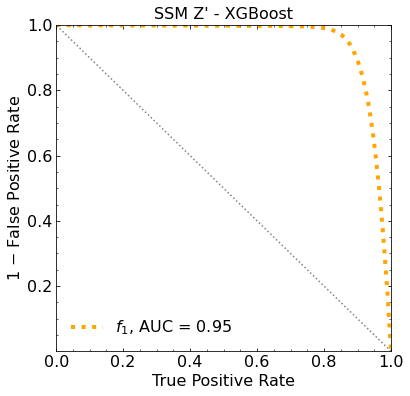


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63592	validation_1-logloss:0.63587
[1]	validation_0-logloss:0.58851	validation_1-logloss:0.58861
[2]	validation_0-logloss:0.54873	validation_1-logloss:0.54901
[3]	validation_0-logloss:0.51434	validation_1-logloss:0.51459
[4]	validation_0-logloss:0.48569	validation_1-logloss:0.48605
[5]	validation_0-logloss:0.46038	validation_1-logloss:0.46065
[6]	validation_0-logloss:0.43829	validation_1-logloss:0.43869
[7]	validation_0-logloss:0.41862	validation_1-logloss:0.41901
[8]	validation_0-logloss:0.40213	validation_1-logloss:0.40248
[9]	validation_0-logloss:0.38723	validation_1-logloss:0.38768
[10]	validation_0-logloss:0.37493	validation_1-logloss:0.37547
[11]	validation_0-logloss:0.36324	validation_1-logloss:0.36373
[12]	validation_0-logloss:0.35260	validation_1-logloss:0.35321
[13]	validation_0-logloss:0.34346	validation_1-logloss:0.34402
[14]	validation_0-logloss:0.33516	validation_1-logloss:0.33578
[15]	validation_0-logloss:0.32780	validation_1-logloss:0.32840
[1

[130]	validation_0-logloss:0.23500	validation_1-logloss:0.23935
[131]	validation_0-logloss:0.23498	validation_1-logloss:0.23935
[132]	validation_0-logloss:0.23495	validation_1-logloss:0.23933
[133]	validation_0-logloss:0.23493	validation_1-logloss:0.23933
[134]	validation_0-logloss:0.23489	validation_1-logloss:0.23931
[135]	validation_0-logloss:0.23483	validation_1-logloss:0.23931
[136]	validation_0-logloss:0.23479	validation_1-logloss:0.23930
[137]	validation_0-logloss:0.23476	validation_1-logloss:0.23930
[138]	validation_0-logloss:0.23474	validation_1-logloss:0.23930
[139]	validation_0-logloss:0.23471	validation_1-logloss:0.23930
[140]	validation_0-logloss:0.23462	validation_1-logloss:0.23926
[141]	validation_0-logloss:0.23460	validation_1-logloss:0.23926
[142]	validation_0-logloss:0.23456	validation_1-logloss:0.23924
[143]	validation_0-logloss:0.23452	validation_1-logloss:0.23924
[144]	validation_0-logloss:0.23447	validation_1-logloss:0.23923
[145]	validation_0-logloss:0.23445	valid

[259]	validation_0-logloss:0.23117	validation_1-logloss:0.23904
[260]	validation_0-logloss:0.23114	validation_1-logloss:0.23904
[261]	validation_0-logloss:0.23114	validation_1-logloss:0.23904
[262]	validation_0-logloss:0.23111	validation_1-logloss:0.23904
[263]	validation_0-logloss:0.23109	validation_1-logloss:0.23904
[264]	validation_0-logloss:0.23103	validation_1-logloss:0.23905
[265]	validation_0-logloss:0.23103	validation_1-logloss:0.23904


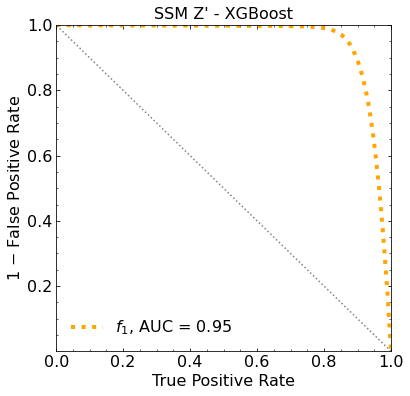


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63568	validation_1-logloss:0.63570
[1]	validation_0-logloss:0.58861	validation_1-logloss:0.58874
[2]	validation_0-logloss:0.54817	validation_1-logloss:0.54847
[3]	validation_0-logloss:0.51413	validation_1-logloss:0.51440
[4]	validation_0-logloss:0.48509	validation_1-logloss:0.48543
[5]	validation_0-logloss:0.46000	validation_1-logloss:0.46027
[6]	validation_0-logloss:0.43782	validation_1-logloss:0.43821
[7]	validation_0-logloss:0.41835	validation_1-logloss:0.41881
[8]	validation_0-logloss:0.40181	validation_1-logloss:0.40240
[9]	validation_0-logloss:0.38682	validation_1-logloss:0.38737
[10]	validation_0-logloss:0.37383	validation_1-logloss:0.37437
[11]	validation_0-logloss:0.36216	validation_1-logloss:0.36273
[12]	validation_0-logloss:0.35194	validation_1-logloss:0.35258
[13]	validation_0-logloss:0.34272	validation_1-logloss:0.34341
[14]	validation_0-logloss:0.33437	validation_1-logloss:0.33509
[15]	validation_0-logloss:0.32585	validation_1-logloss:0.32666
[1

[130]	validation_0-logloss:0.23378	validation_1-logloss:0.23906
[131]	validation_0-logloss:0.23373	validation_1-logloss:0.23906
[132]	validation_0-logloss:0.23369	validation_1-logloss:0.23905
[133]	validation_0-logloss:0.23367	validation_1-logloss:0.23904
[134]	validation_0-logloss:0.23362	validation_1-logloss:0.23904
[135]	validation_0-logloss:0.23359	validation_1-logloss:0.23904
[136]	validation_0-logloss:0.23355	validation_1-logloss:0.23904
[137]	validation_0-logloss:0.23352	validation_1-logloss:0.23903
[138]	validation_0-logloss:0.23351	validation_1-logloss:0.23904
[139]	validation_0-logloss:0.23343	validation_1-logloss:0.23900
[140]	validation_0-logloss:0.23338	validation_1-logloss:0.23900
[141]	validation_0-logloss:0.23335	validation_1-logloss:0.23900
[142]	validation_0-logloss:0.23332	validation_1-logloss:0.23900
[143]	validation_0-logloss:0.23324	validation_1-logloss:0.23896
[144]	validation_0-logloss:0.23323	validation_1-logloss:0.23896
[145]	validation_0-logloss:0.23319	valid

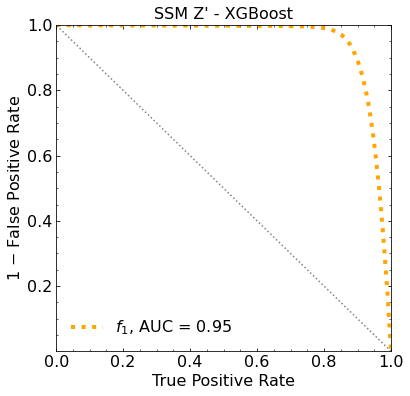


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63602	validation_1-logloss:0.63596
[1]	validation_0-logloss:0.58874	validation_1-logloss:0.58882
[2]	validation_0-logloss:0.54881	validation_1-logloss:0.54878
[3]	validation_0-logloss:0.51508	validation_1-logloss:0.51509
[4]	validation_0-logloss:0.48609	validation_1-logloss:0.48618
[5]	validation_0-logloss:0.46075	validation_1-logloss:0.46084
[6]	validation_0-logloss:0.43888	validation_1-logloss:0.43900
[7]	validation_0-logloss:0.41951	validation_1-logloss:0.41960
[8]	validation_0-logloss:0.40297	validation_1-logloss:0.40304
[9]	validation_0-logloss:0.38837	validation_1-logloss:0.38845
[10]	validation_0-logloss:0.37549	validation_1-logloss:0.37561
[11]	validation_0-logloss:0.36396	validation_1-logloss:0.36409
[12]	validation_0-logloss:0.35318	validation_1-logloss:0.35324
[13]	validation_0-logloss:0.34385	validation_1-logloss:0.34389
[14]	validation_0-logloss:0.33516	validation_1-logloss:0.33516
[15]	validation_0-logloss:0.32642	validation_1-logloss:0.32648
[1

[130]	validation_0-logloss:0.23528	validation_1-logloss:0.23937
[131]	validation_0-logloss:0.23525	validation_1-logloss:0.23936
[132]	validation_0-logloss:0.23521	validation_1-logloss:0.23936
[133]	validation_0-logloss:0.23516	validation_1-logloss:0.23936
[134]	validation_0-logloss:0.23513	validation_1-logloss:0.23934
[135]	validation_0-logloss:0.23511	validation_1-logloss:0.23934
[136]	validation_0-logloss:0.23507	validation_1-logloss:0.23934
[137]	validation_0-logloss:0.23504	validation_1-logloss:0.23934
[138]	validation_0-logloss:0.23502	validation_1-logloss:0.23934
[139]	validation_0-logloss:0.23495	validation_1-logloss:0.23931
[140]	validation_0-logloss:0.23492	validation_1-logloss:0.23931
[141]	validation_0-logloss:0.23489	validation_1-logloss:0.23931
[142]	validation_0-logloss:0.23485	validation_1-logloss:0.23930
[143]	validation_0-logloss:0.23482	validation_1-logloss:0.23930
[144]	validation_0-logloss:0.23478	validation_1-logloss:0.23929
[145]	validation_0-logloss:0.23474	valid

[259]	validation_0-logloss:0.23126	validation_1-logloss:0.23918
[260]	validation_0-logloss:0.23121	validation_1-logloss:0.23918
[261]	validation_0-logloss:0.23119	validation_1-logloss:0.23919
[262]	validation_0-logloss:0.23116	validation_1-logloss:0.23919
[263]	validation_0-logloss:0.23115	validation_1-logloss:0.23919
[264]	validation_0-logloss:0.23110	validation_1-logloss:0.23918
[265]	validation_0-logloss:0.23110	validation_1-logloss:0.23918
[266]	validation_0-logloss:0.23109	validation_1-logloss:0.23918
[267]	validation_0-logloss:0.23105	validation_1-logloss:0.23918
[268]	validation_0-logloss:0.23103	validation_1-logloss:0.23917
[269]	validation_0-logloss:0.23101	validation_1-logloss:0.23918
[270]	validation_0-logloss:0.23097	validation_1-logloss:0.23918
[271]	validation_0-logloss:0.23094	validation_1-logloss:0.23918
[272]	validation_0-logloss:0.23090	validation_1-logloss:0.23917
[273]	validation_0-logloss:0.23087	validation_1-logloss:0.23917
[274]	validation_0-logloss:0.23086	valid

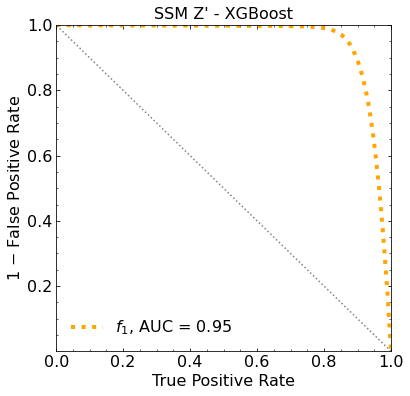


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63564	validation_1-logloss:0.63573
[1]	validation_0-logloss:0.58807	validation_1-logloss:0.58837
[2]	validation_0-logloss:0.54762	validation_1-logloss:0.54821
[3]	validation_0-logloss:0.51338	validation_1-logloss:0.51401
[4]	validation_0-logloss:0.48471	validation_1-logloss:0.48554
[5]	validation_0-logloss:0.45954	validation_1-logloss:0.46025
[6]	validation_0-logloss:0.43754	validation_1-logloss:0.43830
[7]	validation_0-logloss:0.41830	validation_1-logloss:0.41908
[8]	validation_0-logloss:0.40170	validation_1-logloss:0.40263
[9]	validation_0-logloss:0.38675	validation_1-logloss:0.38772
[10]	validation_0-logloss:0.37376	validation_1-logloss:0.37482
[11]	validation_0-logloss:0.36290	validation_1-logloss:0.36392
[12]	validation_0-logloss:0.35257	validation_1-logloss:0.35366
[13]	validation_0-logloss:0.34334	validation_1-logloss:0.34448
[14]	validation_0-logloss:0.33357	validation_1-logloss:0.33478
[15]	validation_0-logloss:0.32641	validation_1-logloss:0.32772
[1

[130]	validation_0-logloss:0.23338	validation_1-logloss:0.23927
[131]	validation_0-logloss:0.23333	validation_1-logloss:0.23927
[132]	validation_0-logloss:0.23330	validation_1-logloss:0.23926
[133]	validation_0-logloss:0.23326	validation_1-logloss:0.23925
[134]	validation_0-logloss:0.23323	validation_1-logloss:0.23925
[135]	validation_0-logloss:0.23317	validation_1-logloss:0.23923
[136]	validation_0-logloss:0.23313	validation_1-logloss:0.23923
[137]	validation_0-logloss:0.23309	validation_1-logloss:0.23923
[138]	validation_0-logloss:0.23301	validation_1-logloss:0.23920
[139]	validation_0-logloss:0.23297	validation_1-logloss:0.23918
[140]	validation_0-logloss:0.23293	validation_1-logloss:0.23918
[141]	validation_0-logloss:0.23290	validation_1-logloss:0.23917
[142]	validation_0-logloss:0.23286	validation_1-logloss:0.23916
[143]	validation_0-logloss:0.23284	validation_1-logloss:0.23916
[144]	validation_0-logloss:0.23281	validation_1-logloss:0.23916
[145]	validation_0-logloss:0.23278	valid

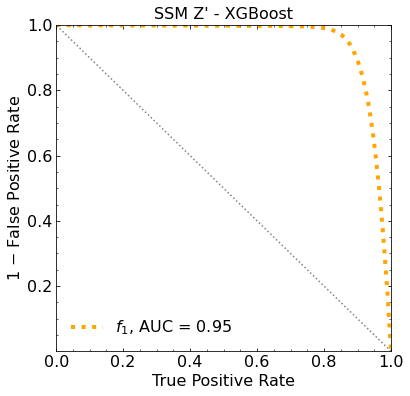


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63557	validation_1-logloss:0.63554
[1]	validation_0-logloss:0.58830	validation_1-logloss:0.58839
[2]	validation_0-logloss:0.54792	validation_1-logloss:0.54813
[3]	validation_0-logloss:0.51430	validation_1-logloss:0.51445
[4]	validation_0-logloss:0.48477	validation_1-logloss:0.48499
[5]	validation_0-logloss:0.45970	validation_1-logloss:0.45987
[6]	validation_0-logloss:0.43801	validation_1-logloss:0.43823
[7]	validation_0-logloss:0.41883	validation_1-logloss:0.41901
[8]	validation_0-logloss:0.40212	validation_1-logloss:0.40235
[9]	validation_0-logloss:0.38774	validation_1-logloss:0.38797
[10]	validation_0-logloss:0.37466	validation_1-logloss:0.37487
[11]	validation_0-logloss:0.36335	validation_1-logloss:0.36361
[12]	validation_0-logloss:0.35310	validation_1-logloss:0.35338
[13]	validation_0-logloss:0.34383	validation_1-logloss:0.34409
[14]	validation_0-logloss:0.33539	validation_1-logloss:0.33576
[15]	validation_0-logloss:0.32700	validation_1-logloss:0.32728
[1

[130]	validation_0-logloss:0.23481	validation_1-logloss:0.23931
[131]	validation_0-logloss:0.23478	validation_1-logloss:0.23931
[132]	validation_0-logloss:0.23474	validation_1-logloss:0.23931
[133]	validation_0-logloss:0.23469	validation_1-logloss:0.23930
[134]	validation_0-logloss:0.23467	validation_1-logloss:0.23931
[135]	validation_0-logloss:0.23464	validation_1-logloss:0.23930
[136]	validation_0-logloss:0.23460	validation_1-logloss:0.23930
[137]	validation_0-logloss:0.23456	validation_1-logloss:0.23928
[138]	validation_0-logloss:0.23453	validation_1-logloss:0.23928
[139]	validation_0-logloss:0.23450	validation_1-logloss:0.23927
[140]	validation_0-logloss:0.23445	validation_1-logloss:0.23927
[141]	validation_0-logloss:0.23440	validation_1-logloss:0.23925
[142]	validation_0-logloss:0.23435	validation_1-logloss:0.23923
[143]	validation_0-logloss:0.23432	validation_1-logloss:0.23924
[144]	validation_0-logloss:0.23430	validation_1-logloss:0.23924
[145]	validation_0-logloss:0.23426	valid

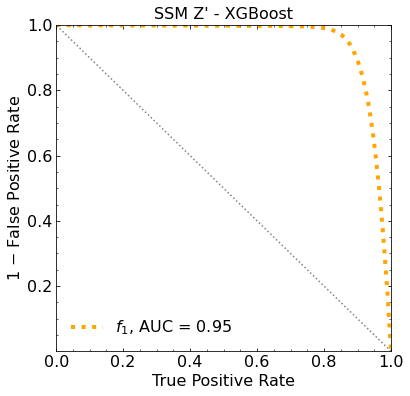


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63549	validation_1-logloss:0.63560
[1]	validation_0-logloss:0.58791	validation_1-logloss:0.58836
[2]	validation_0-logloss:0.54783	validation_1-logloss:0.54832
[3]	validation_0-logloss:0.51355	validation_1-logloss:0.51416
[4]	validation_0-logloss:0.48495	validation_1-logloss:0.48559
[5]	validation_0-logloss:0.45976	validation_1-logloss:0.46048
[6]	validation_0-logloss:0.43818	validation_1-logloss:0.43906
[7]	validation_0-logloss:0.41858	validation_1-logloss:0.41944
[8]	validation_0-logloss:0.40206	validation_1-logloss:0.40298
[9]	validation_0-logloss:0.38694	validation_1-logloss:0.38788
[10]	validation_0-logloss:0.37401	validation_1-logloss:0.37499
[11]	validation_0-logloss:0.36251	validation_1-logloss:0.36352
[12]	validation_0-logloss:0.35195	validation_1-logloss:0.35304
[13]	validation_0-logloss:0.34257	validation_1-logloss:0.34381
[14]	validation_0-logloss:0.33425	validation_1-logloss:0.33550
[15]	validation_0-logloss:0.32549	validation_1-logloss:0.32676
[1

[130]	validation_0-logloss:0.23380	validation_1-logloss:0.23930
[131]	validation_0-logloss:0.23372	validation_1-logloss:0.23927
[132]	validation_0-logloss:0.23371	validation_1-logloss:0.23928
[133]	validation_0-logloss:0.23369	validation_1-logloss:0.23928
[134]	validation_0-logloss:0.23364	validation_1-logloss:0.23927
[135]	validation_0-logloss:0.23363	validation_1-logloss:0.23927
[136]	validation_0-logloss:0.23359	validation_1-logloss:0.23927
[137]	validation_0-logloss:0.23356	validation_1-logloss:0.23926
[138]	validation_0-logloss:0.23351	validation_1-logloss:0.23925
[139]	validation_0-logloss:0.23348	validation_1-logloss:0.23924
[140]	validation_0-logloss:0.23344	validation_1-logloss:0.23924
[141]	validation_0-logloss:0.23341	validation_1-logloss:0.23925
[142]	validation_0-logloss:0.23339	validation_1-logloss:0.23925
[143]	validation_0-logloss:0.23334	validation_1-logloss:0.23925
[144]	validation_0-logloss:0.23328	validation_1-logloss:0.23922
[145]	validation_0-logloss:0.23325	valid

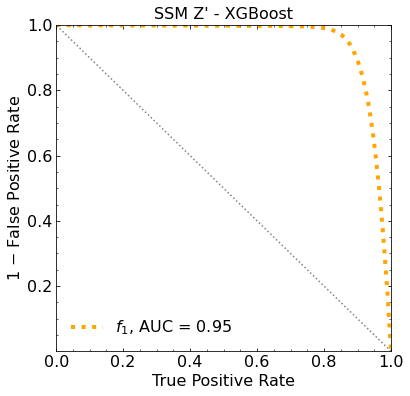


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63583	validation_1-logloss:0.63591
[1]	validation_0-logloss:0.58824	validation_1-logloss:0.58845
[2]	validation_0-logloss:0.54833	validation_1-logloss:0.54860
[3]	validation_0-logloss:0.51396	validation_1-logloss:0.51437
[4]	validation_0-logloss:0.48500	validation_1-logloss:0.48539
[5]	validation_0-logloss:0.46014	validation_1-logloss:0.46061
[6]	validation_0-logloss:0.43775	validation_1-logloss:0.43815
[7]	validation_0-logloss:0.41843	validation_1-logloss:0.41889
[8]	validation_0-logloss:0.40171	validation_1-logloss:0.40214
[9]	validation_0-logloss:0.38701	validation_1-logloss:0.38746
[10]	validation_0-logloss:0.37414	validation_1-logloss:0.37456
[11]	validation_0-logloss:0.36253	validation_1-logloss:0.36301
[12]	validation_0-logloss:0.35242	validation_1-logloss:0.35295
[13]	validation_0-logloss:0.34145	validation_1-logloss:0.34204
[14]	validation_0-logloss:0.33293	validation_1-logloss:0.33353
[15]	validation_0-logloss:0.32592	validation_1-logloss:0.32657
[1

[130]	validation_0-logloss:0.23409	validation_1-logloss:0.23910
[131]	validation_0-logloss:0.23405	validation_1-logloss:0.23910
[132]	validation_0-logloss:0.23402	validation_1-logloss:0.23909
[133]	validation_0-logloss:0.23394	validation_1-logloss:0.23905
[134]	validation_0-logloss:0.23389	validation_1-logloss:0.23905
[135]	validation_0-logloss:0.23386	validation_1-logloss:0.23906
[136]	validation_0-logloss:0.23383	validation_1-logloss:0.23905
[137]	validation_0-logloss:0.23380	validation_1-logloss:0.23904
[138]	validation_0-logloss:0.23377	validation_1-logloss:0.23904
[139]	validation_0-logloss:0.23372	validation_1-logloss:0.23902
[140]	validation_0-logloss:0.23369	validation_1-logloss:0.23902
[141]	validation_0-logloss:0.23366	validation_1-logloss:0.23902
[142]	validation_0-logloss:0.23360	validation_1-logloss:0.23900
[143]	validation_0-logloss:0.23355	validation_1-logloss:0.23899
[144]	validation_0-logloss:0.23353	validation_1-logloss:0.23900
[145]	validation_0-logloss:0.23347	valid

[259]	validation_0-logloss:0.23012	validation_1-logloss:0.23887
[260]	validation_0-logloss:0.23010	validation_1-logloss:0.23887
[261]	validation_0-logloss:0.23007	validation_1-logloss:0.23887
[262]	validation_0-logloss:0.23006	validation_1-logloss:0.23886
[263]	validation_0-logloss:0.23003	validation_1-logloss:0.23887
[264]	validation_0-logloss:0.22998	validation_1-logloss:0.23887
[265]	validation_0-logloss:0.22995	validation_1-logloss:0.23887
[266]	validation_0-logloss:0.22992	validation_1-logloss:0.23887
[267]	validation_0-logloss:0.22987	validation_1-logloss:0.23886
[268]	validation_0-logloss:0.22986	validation_1-logloss:0.23887
[269]	validation_0-logloss:0.22981	validation_1-logloss:0.23886
[270]	validation_0-logloss:0.22979	validation_1-logloss:0.23886
[271]	validation_0-logloss:0.22977	validation_1-logloss:0.23885
[272]	validation_0-logloss:0.22975	validation_1-logloss:0.23885
[273]	validation_0-logloss:0.22972	validation_1-logloss:0.23885
[274]	validation_0-logloss:0.22971	valid

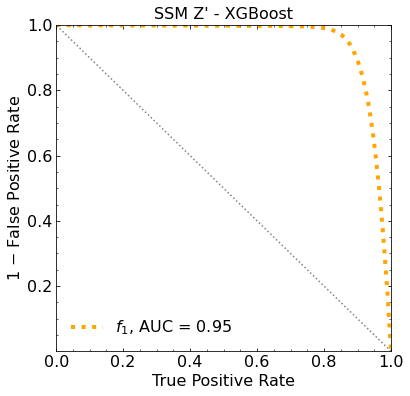


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


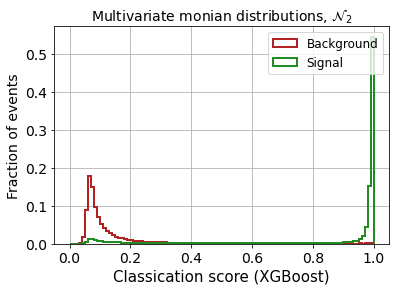

Classification score (10ML):


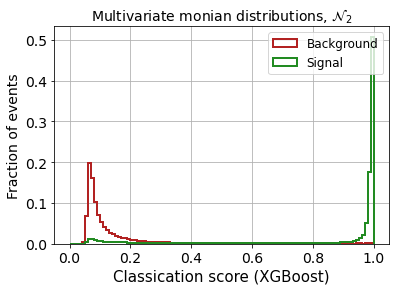

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.433108008760961
Z_bins_logbins :  0.35215464721392276

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  1.013733285356924
Z_bins_logbins :  0.842962647181671

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  1.5336422703666046
Z_bins_logbins :  1.2976920637645761

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  2.1581640791752714
Z_bins_logbins :  1.8595474559792702

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  3.8453082119773043
Z_bins_logbins :  3.4397170100126804

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  5.122655367679353
Z_bins_logbins :  4.676377869533103



In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.433108008760961, 1.013733285356924, 1.5336422703666046, 2.1581640791752714, 3.8453082119773043, 5.122655367679353, 6.323962926379762, 11.489252931451743]
[0.35215464721392276, 0.842962647181671, 1.2976920637645761, 1.8595474559792702, 3.4397170100126804, 4.676377869533103, 5.8587373311981015, 11.034494345484156]


In [65]:
store_Z_bins = [0.433108008760961, 1.013733285356924, 1.5336422703666046, 2.1581640791752714, 3.8453082119773043, 5.122655367679353, 6.323962926379762, 11.489252931451743]

store_Z_bins_logbins = [0.35215464721392276, 0.842962647181671, 1.2976920637645761, 1.8595474559792702, 3.4397170100126804, 4.676377869533103, 5.8587373311981015, 11.034494345484156]

<ipython-input-66-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-66-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


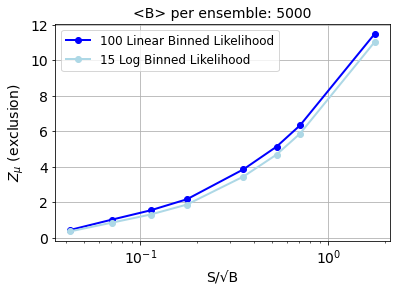

In [66]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.3657119570183754
Z_bins_XG_15bins :  0.26791819886432433
Z_bins_XG_15bins_1ML :  0.2678374039546337
Z_bins_XG_15bins_eq :  0.09655460450434147
Z_bins_XG_15bins_eq_1ML :  0.0965283119794364

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.8735706663269368
Z_bins_XG_15bins :  0.6552614946059496
Z_bins_XG_15bins_1ML :  0.655071683100822
Z_bins_XG_15bins_eq :  0.24075464340771388
Z_bins_XG_15bins_eq_1ML :  0.24068925305989114

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  1.3420377112802955
Z_bins_XG_15bins :  1.0268318966143966
Z_bins_XG_15bins_1ML :  1.0265454051953842
Z_bins_XG_15bins_eq :  0.38420565480568014
Z_bins_XG_15bins_eq_1ML :  0.38410156836651665

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.3657119570183754, 0.8735706663269368, 1.3420377112802955, 1.918174877932676, 3.5248394853275316, 4.771795147936808, 5.958552615641308, 11.129359216112464]
[0.26791819886432433, 0.6552614946059496, 1.0268318966143966, 1.5004516233462772, 2.8997356857374355, 4.04547061699648, 5.169767776918851, 10.273328882621136]
[0.2678374039546337, 0.655071683100822, 1.0265454051953842, 1.5000519468521418, 2.8990558225277043, 4.04460786824605, 5.168755117382373, 10.271837258804268]
[0.09655460450434147, 0.24075464340771388, 0.38420565480568014, 0.5743260467534053, 1.1834249245791797, 1.7342290771066313, 2.319192357753986, 5.484737957231937]
[0.0965283119794364, 0.24068925305989114, 0.38410156836651665, 0.5741709763906572, 1.1831087679787025, 1.7337701018338958, 2.3185845332913995, 5.483369714029085]


In [67]:
store_Z_bins_XG = [0.3657119570183754, 0.8735706663269368, 1.3420377112802955, 1.918174877932676, 3.5248394853275316, 4.771795147936808, 5.958552615641308, 11.129359216112464]

store_Z_bins_XG_15bins = [0.26791819886432433, 0.6552614946059496, 1.0268318966143966, 1.5004516233462772, 2.8997356857374355, 4.04547061699648, 5.169767776918851, 10.273328882621136]
store_Z_bins_XG_15bins_1ML = [0.2678374039546337, 0.655071683100822, 1.0265454051953842, 1.5000519468521418, 2.8990558225277043, 4.04460786824605, 5.168755117382373, 10.271837258804268]

store_Z_bins_XG_15bins_eq = [0.09655460450434147, 0.24075464340771388, 0.38420565480568014, 0.5743260467534053, 1.1834249245791797, 1.7342290771066313, 2.319192357753986, 5.484737957231937]
store_Z_bins_XG_15bins_eq_1ML = [0.0965283119794364, 0.24068925305989114, 0.38410156836651665, 0.5741709763906572, 1.1831087679787025, 1.7337701018338958, 2.3185845332913995, 5.483369714029085]

<ipython-input-68-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-68-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-68-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-68-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and

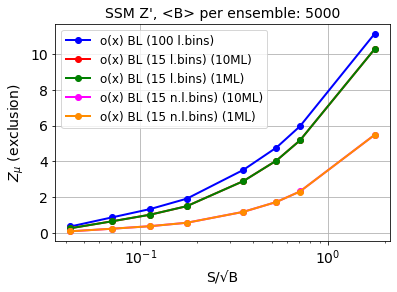

In [68]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf 16139.84379138 16156.39660469 16165.29124561
 16169.99752876 16164.10456858 16137.43080765 16055.07965609
 15849.29420129 15431.38841953 14751.78719702 13796.21408453
 12550.5258979  11007.75962382  9120.81309574  6904.19110268
  4401.71722829  1636.18945929 -1298.78574469 -4412.24431798]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf 22992.44621164 22084.8139412
 20824.73526404 19200.92643877 17243.24836814 15030.8673985
 12632.06317418 10075.94371177  7417.50008251  4682.94738804
  1887.11546906  -991.98855181 -3782.18966379 -5537.41477382]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0091866653175426, kernel='epanechnikov')


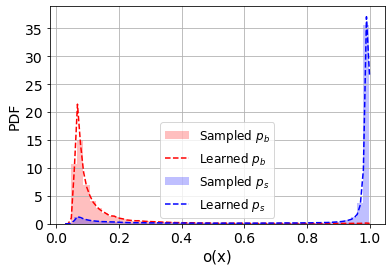


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



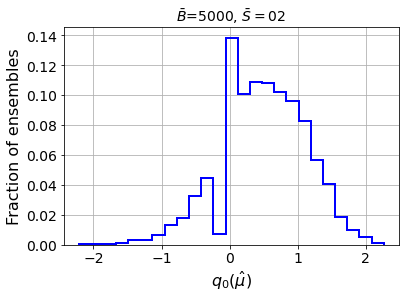

muhat mean:  0.09550325698676193
median q_muhat:  0.5098447088375044
Z_KDE:  0.7140341090154618
Z_KDE mu=0:  0.7140341090154618

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



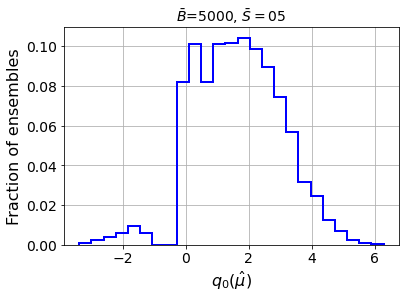

muhat mean:  0.1252259827622451
median q_muhat:  1.6626122009732551
Z_KDE:  1.2894232047598861
Z_KDE mu=0:  1.2894232047598861

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



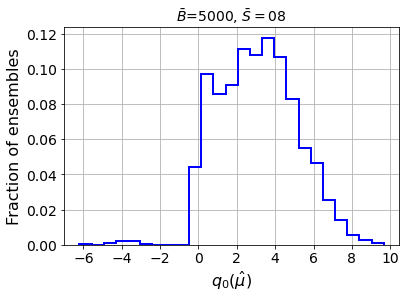

muhat mean:  0.11391633382383855
median q_muhat:  3.0917752476882185
Z_KDE:  1.7583444621826005
Z_KDE mu=0:  1.7583444621826005

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



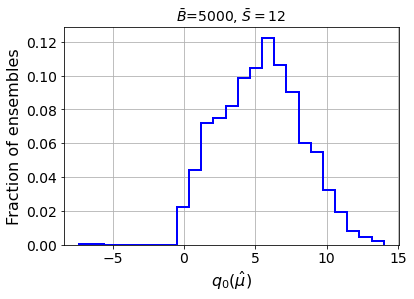

muhat mean:  0.08295143998318269
median q_muhat:  5.480405223627397
Z_KDE:  2.3410265320212407
Z_KDE mu=0:  2.3410265320212407

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



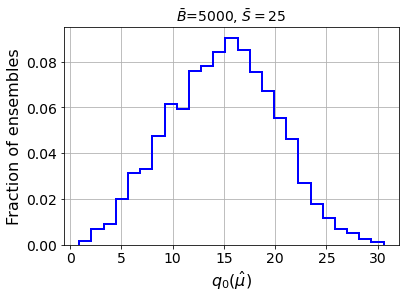

muhat mean:  0.049358300021039345
median q_muhat:  15.028388391041837
Z_KDE:  3.8766465393483887
Z_KDE mu=0:  3.8766465393483887

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



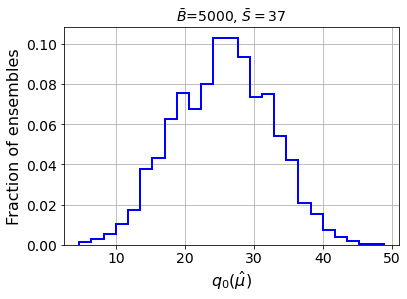

muhat mean:  0.03976005051568091
median q_muhat:  25.71617879940692
Z_KDE:  5.071112185645958
Z_KDE mu=0:  5.071112185645958

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



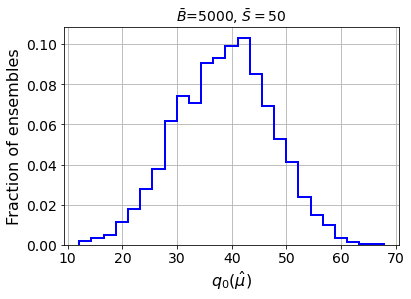

muhat mean:  0.03388725283971392
median q_muhat:  39.019434334048896
Z_KDE:  6.246553796618492
Z_KDE mu=0:  6.246553796618492

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



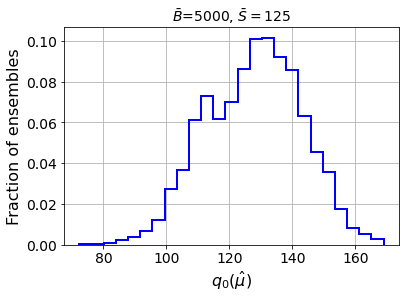

muhat mean:  0.026939291736930857
median q_muhat:  128.77538791729978
Z_KDE:  11.347924388067616
Z_KDE mu=0:  11.347924388067616

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.7140341090154618, 1.2894232047598861, 1.7583444621826005, 2.3410265320212407, 3.8766465393483887, 5.071112185645958, 6.246553796618492, 11.347924388067616]
[0.7140341090154618, 1.2894232047598861, 1.7583444621826005, 2.3410265320212407, 3.8766465393483887, 5.071112185645958, 6.246553796618492, 11.347924388067616]
[0.09550325698676193, 0.1252259827622451, 0.11391633382383855, 0.08295143998318269, 0.049358300021039345, 0.03976005051568091, 0.03388725283971392, 0.026939291736930857]


In [69]:
store_Z_MLL_KDE = [0.7140341090154618, 1.2894232047598861, 1.7583444621826005, 2.3410265320212407, 3.8766465393483887, 5.071112185645958, 6.246553796618492, 11.347924388067616]
store_Z_MLL_KDE_mu0 = [0.7140341090154618, 1.2894232047598861, 1.7583444621826005, 2.3410265320212407, 3.8766465393483887, 5.071112185645958, 6.246553796618492, 11.347924388067616]

store_muhat_mean_MLL = [0.09550325698676193, 0.1252259827622451, 0.11391633382383855, 0.08295143998318269, 0.049358300021039345, 0.03976005051568091, 0.03388725283971392, 0.026939291736930857]

##### For 1 ML

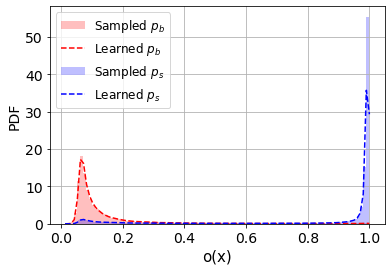


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.380887774399524

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



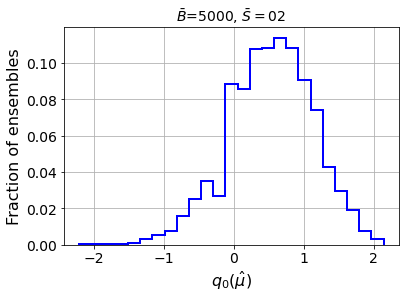

muhat mean:  0.08194998949359109
median q_muhat:  0.5561679040119918
Z_KDE:  0.7457666552025451
Z_KDE mu=0:  0.7457666552025451

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.9075761659037421

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



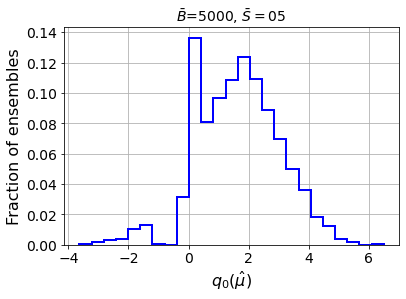

muhat mean:  0.12701282320790416
median q_muhat:  1.6722965197281106
Z_KDE:  1.2931730432266637
Z_KDE mu=0:  1.2931730432266637

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  1.3913311722164903

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



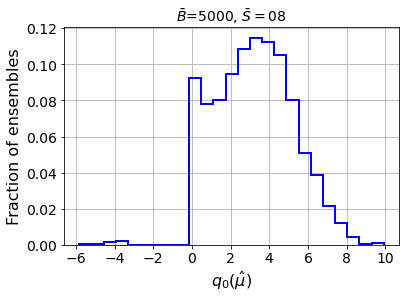

muhat mean:  0.10691612360731553
median q_muhat:  3.2106638408737354
Z_KDE:  1.791832537061914
Z_KDE mu=0:  1.791832537061914

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  1.9838617643279686

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



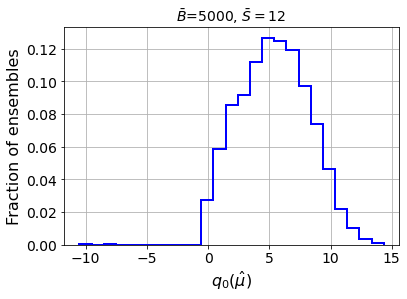

muhat mean:  0.08290939667857894
median q_muhat:  5.384826629817944
Z_KDE:  2.320522921631662
Z_KDE mu=0:  2.320522921631662

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  3.62504604441952

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



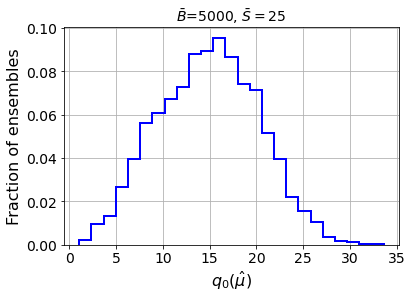

muhat mean:  0.05125184094256258
median q_muhat:  15.032812459921011
Z_KDE:  3.8772171025003246
Z_KDE mu=0:  3.8772171025003246

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  4.890421135393516

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



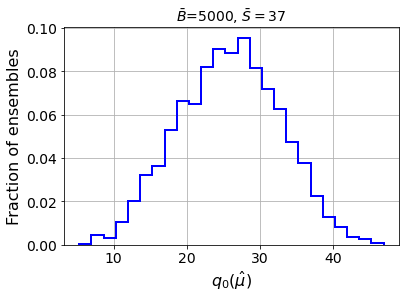

muhat mean:  0.03668701326036624
median q_muhat:  25.952702356486157
Z_KDE:  5.0943794868939785
Z_KDE mu=0:  5.0943794868939785

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  6.090033582565752

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



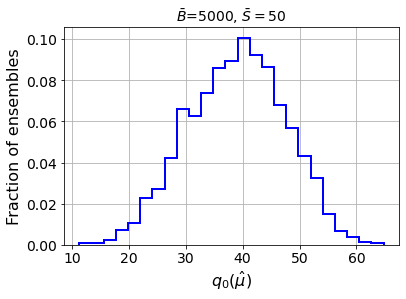

muhat mean:  0.031994110222970135
median q_muhat:  39.28317645101218
Z_KDE:  6.267629252836529
Z_KDE mu=0:  6.267629252836529

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  11.288360955856305

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



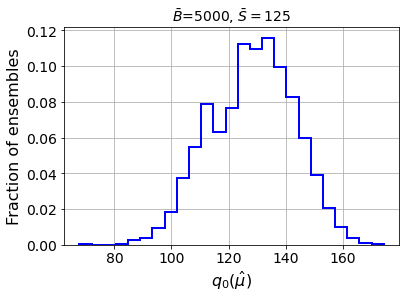

muhat mean:  0.02521079258010118
median q_muhat:  129.19270078983627
Z_KDE:  11.366296705164627
Z_KDE mu=0:  11.366296705164627

 ----------------------------------------- 



In [54]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

# bandwidth = np.logspace(-3.0, 0.05, 20)
# print(bandwidth)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
# print(grid.best_estimator_)

# SM_bandwidth_1ML = grid.best_estimator_.bandwidth
SM_bandwidth_1ML = 0.004386370005779536


# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
# print(grid.best_estimator_)

# NP_bandwidth_1ML = grid.best_estimator_.bandwidth
NP_bandwidth_1ML = 0.0091866653175426






# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [55]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.380887774399524, 0.9075761659037421, 1.3913311722164903, 1.9838617643279686, 3.62504604441952, 4.890421135393516, 6.090033582565752, 11.288360955856305]
[0.7457666552025451, 1.2931730432266637, 1.791832537061914, 2.320522921631662, 3.8772171025003246, 5.0943794868939785, 6.267629252836529, 11.366296705164627]
[0.7457666552025451, 1.2931730432266637, 1.791832537061914, 2.320522921631662, 3.8772171025003246, 5.0943794868939785, 6.267629252836529, 11.366296705164627]
[0.08194998949359109, 0.12701282320790416, 0.10691612360731553, 0.08290939667857894, 0.05125184094256258, 0.03668701326036624, 0.031994110222970135, 0.02521079258010118]


In [56]:
store_Z_KDE_bins = [0.380887774399524, 0.9075761659037421, 1.3913311722164903, 1.9838617643279686, 3.62504604441952, 4.890421135393516, 6.090033582565752, 11.288360955856305]

store_Z_MLL_KDE_1ML = [0.7457666552025451, 1.2931730432266637, 1.791832537061914, 2.320522921631662, 3.8772171025003246, 5.0943794868939785, 6.267629252836529, 11.366296705164627]
store_Z_MLL_KDE_mu0_1ML = [0.7457666552025451, 1.2931730432266637, 1.791832537061914, 2.320522921631662, 3.8772171025003246, 5.0943794868939785, 6.267629252836529, 11.366296705164627]

store_muhat_mean_MLL_1ML = [0.08194998949359109, 0.12701282320790416, 0.10691612360731553, 0.08290939667857894, 0.05125184094256258, 0.03668701326036624, 0.031994110222970135, 0.02521079258010118]

<ipython-input-57-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-57-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


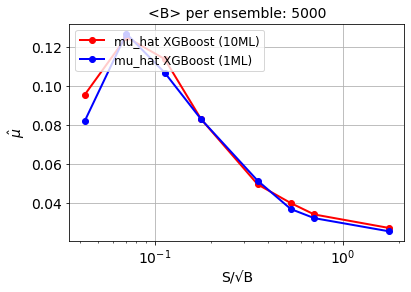

<ipython-input-57-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-57-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-57-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-57-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

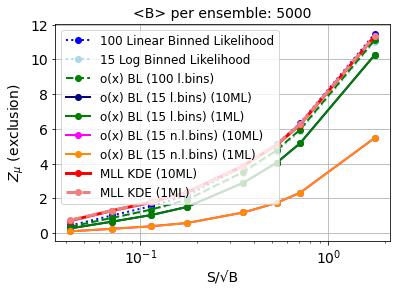

In [57]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [58]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.07773264243674997
WP:  0.5     S/B**0.5=  0.12398731336333728
WP:  0.75     S/B**0.5=  0.17688557986238523
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.19433151957664183
WP:  0.5     S/B**0.5=  0.3099680856466041
WP:  0.75     S/B**0.5=  0.4422135921277735
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.31093001604287196
WP:  0.5     S/B**0.5=  0.49594798776304966
WP:  0.75     S/B**0.5=  0.7075400312417034
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.4663941934815711
WP:  0.5     S/B**0.5=  0.743920083048447
WP:  0.75     S/B**0.5=  1.0613117125629508
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.971651108825952
WP:  0.5     S/B**0.5=  1.54982559515446

In [59]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.07773264243674997, 0.19433151957664183, 0.31093001604287196, 0.4663941934815711, 0.971651108825952, 1.4380468424585504, 1.943302217651904, 4.858233673842223]
SrootB_WP1_XG = [0.12398731336333728, 0.3099680856466041, 0.49594798776304966, 0.743920083048447, 1.5498255951544688, 2.2937491987730487, 3.0996511903089377, 7.749096160724762]
SrootB_WP2_XG = [0.17688557986238523, 0.4422135921277735, 0.7075400312417034, 1.0613117125629508, 2.2110517657372233, 3.2723698428942387, 4.422103531474447, 11.05518360861262]

<ipython-input-60-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-60-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-60-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-60-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

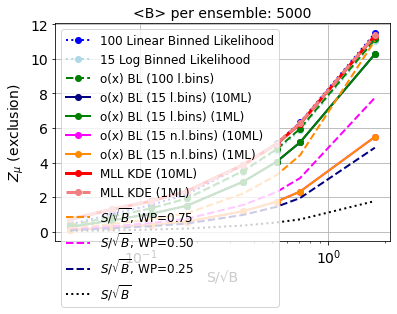

In [60]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-61-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


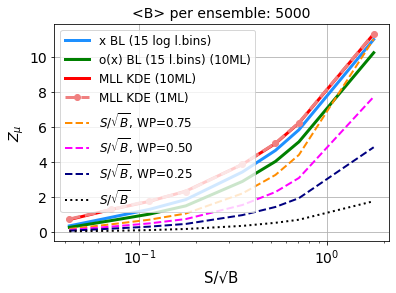

In [61]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

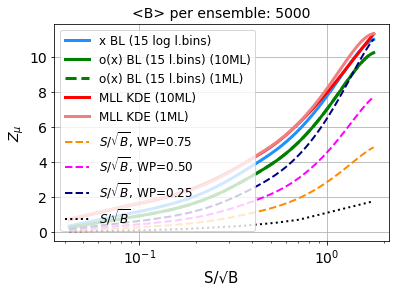

In [62]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='quadratic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [63]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [64]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3106
acceptance_SM = 0.4*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.720128
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)



np.savetxt('saved-models/results5000GeV-mumu.txt', [cross_bins_logbins_95CL,cross_bins_XG_15bins_95CL,cross_XG_MLL_95CL,cross_bins_XG_15bins_1ML_95CL,cross_XG_MLL_1ML_95CL])


correct_factor:  0.44726399999999994

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.1518445998280385 9.971411240957877 3.323803746985959e-06
0.19483996106166745 12.79485329157789 4.26495109719263e-06
0.10049032545397196 6.5990516750285115 2.1996838916761703e-06
0.19489502456851615 12.79846923097764 4.26615641032588e-06
0.09778336861930473 6.4212898063775565 2.1404299354591856e-06
